### Gambler's problem (p. 84 in book)
- flipping coin (with probability p landing heads)
- player can place bet on coin toss (only whole euros)
- player wins when reaching 100€
- player loses when reaching 0€

- undiscounted, episodic, finite MDP
- state is gamblers capital (1-99)
- actions are the stakes placed

### Approach
1. Implement the game (coin toss with probability, placing bets, having money)
2. Implement MDP with states and possible actions (with plotting functions)
3. Try changing parameters

In [37]:
import random 

PH = 0.4 # probability for heads
if PH < 0.5:
    PH = 1.0 - PH # we always choose the more probable side

class gambler:
    WINNING_THRESHOLD = 100
    LOSING_THRESHOLD = 0
    money = 50

    def place_bet(self):
        # TODO: Calculate which bet should be placed
        bet = int(input("Place bet:"))
        print("state:", self.money, "bet:", bet)
        return bet

while gambler.money > gambler.LOSING_THRESHOLD and gambler.money < gambler.WINNING_THRESHOLD:
    bet = gambler.place_bet()
    if bet < 0 or bet > gambler.money:
        print("Bet must be between 0 and your amount of money")
        continue

    if random.uniform(0,1) <= PH:
        gambler.money += bet
        print("you won!", gambler.money)
    else:
        gambler.money -= bet
        print("you lost!", gambler.money)
print("Done playing, money:", gambler.money)


    

state: 50 bet: 10
you won! 60
state: 60 bet: 10
you won! 70
state: 70 bet: 10
you won! 80
state: 80 bet: 10
you won! 90
state: 90 bet: 10
you lost! 80
state: 80 bet: 10
you won! 90
state: 90 bet: 10
you lost! 80
state: 80 bet: 10
you lost! 70
state: 70 bet: 10
you lost! 60
state: 60 bet: 10
you lost! 50
state: 50 bet: 10
you won! 60
state: 60 bet: 10
you won! 70
state: 70 bet: 20
you lost! 50
state: 50 bet: 20
you won! 70
state: 70 bet: 20
you won! 90
state: 90 bet: 2
you lost! 88
state: 88 bet: 20
you won! 108
Done playing, money: 108


In [ ]:
class MDP:
    def __init__(self):
        # Step 1: Define the state space
        self.state_space = ...
        # Step 2: Define the action space
        self.action_space = ...
        # Step 3: Define the transition probabilities
        self.transition_probs = ...
        # Step 4: Define the reward function
        self.reward_function = ...

    def value_iteration(self):
        # Step 5: Implement the value iteration algorithm
        value_function = ...
        while not convergence:
            # Value function update step
            value_function_new = ...
            # Check for convergence
            convergence = ...
            # Update value function
            value_function = value_function_new

        return value_function

    def policy_iteration(self):
        # Step 5: Implement the policy iteration algorithm
        policy = ...
        while not convergence:
            # Policy evaluation step
            value_function = self.policy_evaluation(policy)
            # Policy improvement step
            new_policy = ...
            # Check for convergence
            convergence = ...
            # Update policy
            policy = new_policy
        return policy

    def policy_evaluation(self, policy):
        # Step 5: Implement the policy evaluation algorithm
        value_function = ...
        while not convergence:
            # Value function update step
            value_function_new = ...
            # Check for convergence
            convergence = ...
            # Update value function
            value_function = value_function_new
        return value_function

    def execute_policy(self, policy):
        # Step 6: Implement the policy execution
        state = initial_state
        while not episode_terminated:
            # Take action based on policy
            action = policy[state]
            # Update state based on action and transition probabilities
            new_state = ...
            # Update episode termination condition
            episode_terminated = ...
            # Update state for next iteration
            state = new_state
        return final_reward


Number of iterations: 11


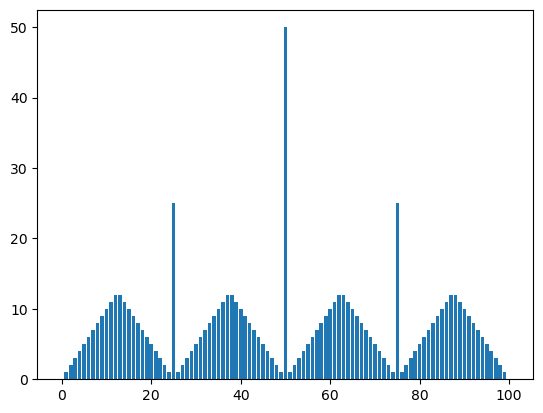

In [9]:
import numpy as np
import matplotlib.pyplot as plt

num_states = 100
epsilon_threshold = 1.0e-5
probability_heads = 0.4

states = list(range(0, num_states + 1))
value_func = np.zeros(num_states + 1)
policy = [0 for _ in range(num_states + 1)]
reward_func = np.zeros(num_states + 1)
reward_func[100] = 1.0 # Reward 1.0 when reaching 100 euros

num_iterations = 1
while True:
    policy_improvement_history = []
    # going through all states
    for state_index in (range(1, num_states)):
        # keeping track of old state value to be able to compare the old value with the new value for each iteration
        old_value = value_func[state_index]
        optimal_value_temp = value_func[state_index]


        for index_new in range(min(state_index, num_states-state_index)+1):
            # value iteration equation
            new_value = probability_heads * (reward_func[state_index + index_new] + value_func[state_index + index_new]) \
                     + (1 - probability_heads) * (reward_func[state_index - index_new] + value_func[state_index - index_new])

            # Change action only if improvement is large enough
            if new_value > (optimal_value_temp + epsilon_threshold):
                optimal_value_temp = new_value
                value_func[state_index] = new_value
                policy[state_index] = index_new

        # keep track of policy improvement
        policy_improvement_this_state = abs(value_func[state_index] - old_value)
        policy_improvement_history.append(policy_improvement_this_state)

    # Stop iteration if improvement is not large enough
    if (max(policy_improvement_history) < epsilon_threshold):
        break
    num_iterations += 1

print("Number of iterations:", num_iterations)
plt.bar(states, policy)
plt.show()

### Using Policy Iteration

In [10]:
import numpy as np
import matplotlib.pyplot as plt

num_states = 100
epsilon_threshold = 1.0e-5
probability_heads = 0.4

states = list(range(0, num_states + 1))
value_func = np.zeros(num_states + 1)
policy = [0 for _ in range(num_states + 1)]
reward_func = np.zeros(num_states + 1)
reward_func[100] = 1.0  # Reward 1.0 when reaching 100 euros

num_iterations = 1
while True:
    policy_stable = True
    
    # Policy Evaluation
    while True:
        delta = 0
        for state_index in range(1, num_states):
            old_value = value_func[state_index]
            bet_index = policy[state_index]

            new_value = probability_heads * (reward_func[state_index + bet_index] + value_func[state_index + bet_index]) \
                     + (1 - probability_heads) * (reward_func[state_index - bet_index] + value_func[state_index - bet_index])
            value_func[state_index] = new_value

            delta = max(delta, abs(old_value - new_value))

        if delta < epsilon_threshold:
            break

    # Policy Improvement
    for state_index in range(1, num_states):
        old_policy = policy[state_index]
        optimal_value_temp = value_func[state_index]
        best_bet = 0

        num_possible_bets = min(state_index + 1, num_states - state_index + 1)
        for bet_index in range(num_possible_bets):
            new_value = probability_heads * (reward_func[state_index + bet_index] + value_func[state_index + bet_index]) \
                     + (1 - probability_heads) * (reward_func[state_index - bet_index] + value_func[state_index - bet_index])

            if new_value > optimal_value_temp:
                optimal_value_temp = new_value
                best_bet = bet_index

        policy[state_index] = best_bet

        if old_policy != best_bet:
            policy_stable = False

    if policy_stable:
        break

    num_iterations += 1

print("Number of iterations:", num_iterations)
plt.bar(states, policy)
plt.show()

Unexpected exception formatting exception. Falling back to standard exception


Traceback (most recent call last):
  File "/Users/mariusoechslein/opt/anaconda3/envs/master/lib/python3.11/site-packages/IPython/core/interactiveshell.py", line 3505, in run_code
    exec(code_obj, self.user_global_ns, self.user_ns)
  File "/var/folders/yz/qr1p847j6qg7rqcz1kxb6gt00000gn/T/ipykernel_92928/784324653.py", line -1, in <module>
KeyboardInterrupt

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "/Users/mariusoechslein/opt/anaconda3/envs/master/lib/python3.11/site-packages/IPython/core/interactiveshell.py", line 2102, in showtraceback
    stb = self.InteractiveTB.structured_traceback(
          ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/Users/mariusoechslein/opt/anaconda3/envs/master/lib/python3.11/site-packages/IPython/core/ultratb.py", line 1310, in structured_traceback
    return FormattedTB.structured_traceback(
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/Users/mariusoechslein/opt/anaconda3/en